In [1]:
# Importing python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('insuranceFraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [3]:
data.shape

(1000, 39)

In [4]:
# Checking the types of data
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
# In this dataset missing values have been denoted by '?'.
# Here we are replacing ? with NaN for them to be imputed down the line
data = data.replace('?', np.nan)

In [6]:
# Dropping the list of columns not necessary for prediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']
data.drop(columns=cols_to_drop, inplace=True)

In [7]:
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NaN,0,0,NaN,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NaN,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


In [8]:
# Checking for missing values
data.isna().sum()

months_as_customer               0
age                              0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim                   0
vehicle_claim                    0
fraud_reported                   0
dtype: int64

In [9]:
data['collision_type']

0       Side Collision
1                  NaN
2       Rear Collision
3      Front Collision
4                  NaN
            ...       
995    Front Collision
996     Rear Collision
997     Side Collision
998     Rear Collision
999                NaN
Name: collision_type, Length: 1000, dtype: object

In [10]:
# Checking for the number of categorical and numerical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [11]:
# As the columns which have missing values, they are only categorical, we'll use the categorical imputer
# Add CategoricalImputer that replaces null-like values with the mode for string-like columns.
# import categorical imputer

from sklearn_pandas import CategoricalImputer
imputer = CategoricalImputer()

In [12]:
# imputing the missing values from the column

data['collision_type'] = imputer.fit_transform(data['collision_type'])
data['property_damage'] = imputer.fit_transform(data['property_damage'])
data['police_report_available'] = imputer.fit_transform(data['police_report_available'])

In [13]:
# Extracting the categorical columns
cat_data = data.select_dtypes(include=['object']).copy()

In [14]:
cat_data.columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [15]:
cat_data.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N


Checking the categorical values present in the columns to decide for getDummies encode or custom mapping to convert categorical data to numeric one

In [16]:
cat_data['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [17]:
cat_data['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [18]:
cat_data['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [19]:
cat_data['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [20]:
cat_data['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

In [21]:
cat_data['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

In [22]:
cat_data['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [23]:
# custom mapping for encoding
cat_data['policy_csl'] = cat_data['policy_csl'].map({'100/300': 1, '250/500': 2.5, '500/1000': 5})
cat_data['insured_education_level'] = cat_data['insured_education_level'].map({'JD': 1, 'High School': 2, 'College': 3, 'Masters': 4, 'Associate': 5, 'MD': 6, 'PhD': 7 })
cat_data['incident_severity'] = cat_data['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
cat_data['insured_sex'] = cat_data['insured_sex'].map({'FEMALE': 0, 'MALE': 1})
cat_data['property_damage'] = cat_data['property_damage'].map({'NO': 0, 'YES': 1})
cat_data['police_report_available'] = cat_data['police_report_available'].map({'NO': 0, 'YES': 1})
cat_data['fraud_reported'] = cat_data['fraud_reported'].map({'N': 0, 'Y': 1})

In [24]:
# auto encoding of categorical variables
for col in cat_data.drop(columns=['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available','fraud_reported']).columns:
    cat_data = pd.get_dummies(cat_data, columns=[col], prefix = [col], drop_first=True)

In [25]:
# data after encoding
cat_data.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,2.5,1,6,3,1,1,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,2.5,1,6,2,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,1.0,0,7,2,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2.5,0,7,3,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5.0,1,5,2,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [26]:
# extracting the numerical columns
num_data = data.select_dtypes(include=['int64']).copy()

In [27]:
num_data.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [28]:
num_data.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1000,0,53300,0,5,1,1,2,71610,6510,13020,52080
1,228,42,2000,5000000,0,0,8,1,0,0,5070,780,780,3510
2,134,29,2000,5000000,35100,0,7,3,2,3,34650,7700,3850,23100
3,256,41,2000,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720
4,228,44,1000,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550


In [29]:
num_data.dtypes

months_as_customer             int64
age                            int64
policy_deductable              int64
umbrella_limit                 int64
capital-gains                  int64
capital-loss                   int64
incident_hour_of_the_day       int64
number_of_vehicles_involved    int64
bodily_injuries                int64
witnesses                      int64
total_claim_amount             int64
injury_claim                   int64
property_claim                 int64
vehicle_claim                  int64
dtype: object

In [30]:
cat_data.dtypes

policy_csl                                float64
insured_sex                                 int64
insured_education_level                     int64
incident_severity                           int64
property_damage                             int64
police_report_available                     int64
fraud_reported                              int64
insured_occupation_armed-forces             uint8
insured_occupation_craft-repair             uint8
insured_occupation_exec-managerial          uint8
insured_occupation_farming-fishing          uint8
insured_occupation_handlers-cleaners        uint8
insured_occupation_machine-op-inspct        uint8
insured_occupation_other-service            uint8
insured_occupation_priv-house-serv          uint8
insured_occupation_prof-specialty           uint8
insured_occupation_protective-serv          uint8
insured_occupation_sales                    uint8
insured_occupation_tech-support             uint8
insured_occupation_transport-moving         uint8


In [31]:
# combining the Numerical and categorical dataframes to get the final dataset
final_data = pd.concat([num_data, cat_data], axis=1)

In [32]:
final_data.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,53300,0,5,1,1,2,...,0,0,1,0,0,1,0,0,0,1
1,228,42,2000,5000000,0,0,8,1,0,0,...,0,0,0,1,1,0,0,0,0,1
2,134,29,2000,5000000,35100,0,7,3,2,3,...,0,0,0,0,1,0,0,0,0,1
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,0,0,1,0,0,0,0,0,0,1
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,0,0,0,1,1,0,0,1,0,0


In [33]:
final_data.dtypes

months_as_customer                          int64
age                                         int64
policy_deductable                           int64
umbrella_limit                              int64
capital-gains                               int64
capital-loss                                int64
incident_hour_of_the_day                    int64
number_of_vehicles_involved                 int64
bodily_injuries                             int64
witnesses                                   int64
total_claim_amount                          int64
injury_claim                                int64
property_claim                              int64
vehicle_claim                               int64
policy_csl                                float64
insured_sex                                 int64
insured_education_level                     int64
incident_severity                           int64
property_damage                             int64
police_report_available                     int64


###  Separating the feature columns and target columns

In [34]:
x = final_data.drop('fraud_reported', axis=1)
y = final_data['fraud_reported']

### Distribution of data in some columns below

In [35]:
final_data['policy_csl'].unique()

array([2.5, 1. , 5. ])

(array([349.,   0.,   0., 351.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

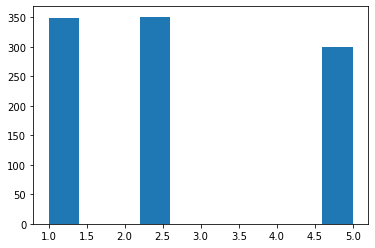

In [36]:
plt.hist(final_data['policy_csl'])

We can see that for almost all categories of policy_csl, the data is uniformly distributed

In [37]:
final_data['insured_sex'].unique()

array([1, 0], dtype=int64)

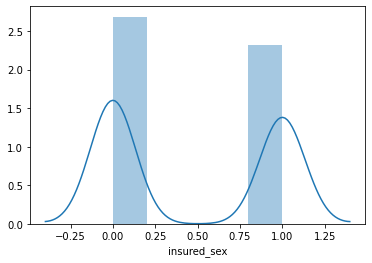

In [38]:
sns.distplot(final_data['insured_sex'])

we  can see that for almost all categories of the gender of the insured the data is uniformly distributed

In [39]:
final_data['insured_education_level'].unique()

array([6, 7, 5, 4, 2, 3, 1], dtype=int64)

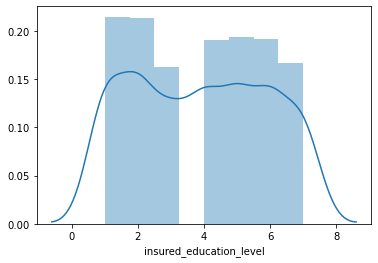

In [40]:
sns.distplot(final_data['insured_education_level'])

we  can see that for almost all categories of the education level of the person insured the data is uniformly distributed

In [41]:
final_data['incident_severity'].unique()

array([3, 2, 4, 1], dtype=int64)

In [42]:
data['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

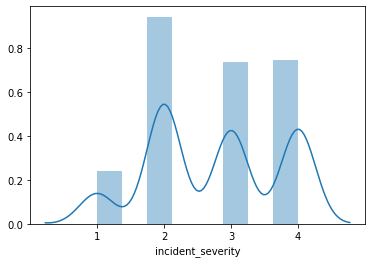

In [43]:
sns.distplot(final_data['incident_severity'])

We can see that there are least claims for trivial Damage,
most claims for minor Damage, and for major Damage and Total loss incidents the claims are almost equal.

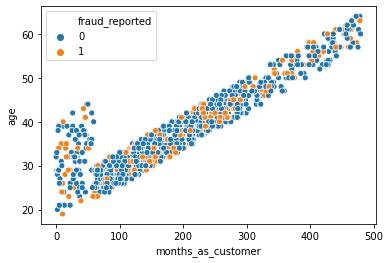

In [44]:
sns.scatterplot(final_data['months_as_customer'],final_data['age'], hue=final_data['fraud_reported'] )


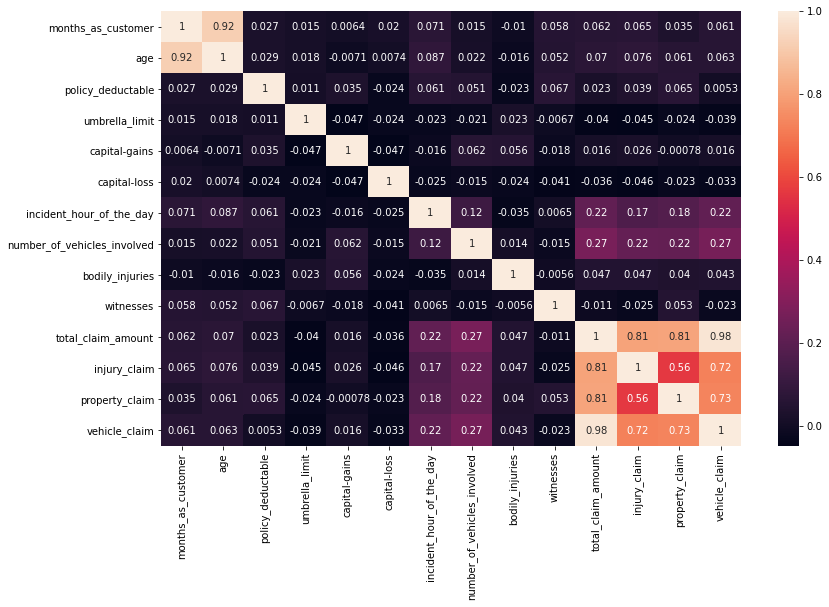

In [45]:
plt.figure(figsize=(13,8))
sns.heatmap(num_data.corr(), annot=True)

From the plot above, we can see that there is high correlation between Age and the number of months. we'll drop the age column.
Also, there is high correlation between total claim amount, injury claim,vehicle claim, and property claim as total claim is the sum of all others. So, we'll drop the total claim column.

In [46]:
x.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_csl', 'insured_sex', 'insured_education_level',
       'incident_severity', 'property_damage', 'police_report_available',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_

In [47]:
x.drop(columns=['age', 'total_claim_amount'], inplace=True)

### Splitting the data for model training as "train set" and "test set"

In [48]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=355)

In [49]:
train_x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
65,254,500,0,35700,0,6,3,2,2,13720,...,0,0,0,0,0,0,0,0,0,0
244,95,1000,0,0,-70300,3,1,1,2,640,...,0,0,0,1,1,0,0,1,0,0
595,56,500,0,0,-28800,13,1,1,2,0,...,0,0,1,0,1,0,0,0,0,1
873,322,2000,0,0,-46000,18,1,0,2,7680,...,0,0,1,0,1,0,0,0,0,0
631,147,1000,6000000,0,-48400,2,2,1,2,9760,...,0,0,0,0,1,0,0,0,1,0


In [50]:
num_data=train_x[['months_as_customer', 'policy_deductable', 'umbrella_limit','capital-gains',
                  'capital-loss','incident_hour_of_the_day','number_of_vehicles_involved',
                  'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim','vehicle_claim']]

In [51]:
num_data.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [52]:
print(train_x.shape)
print(num_data.shape)

(750, 45)
(750, 12)


Here all the columns are used for training data 


### Scaling the numeric values in the dataset

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
scaled_data = scaler.fit_transform(num_data)
scaled_num_data = pd.DataFrame(data=scaled_data, columns=num_data.columns, index=train_x.index)
scaled_num_data.shape

(750, 12)

In [55]:
scaled_num_data.isna().sum()

months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
dtype: int64

In [56]:
train_x.drop(columns=scaled_num_data.columns, inplace=True)

C:\Users\spgha\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [57]:
train_x.shape

(750, 33)

In [58]:
train_x.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
65,1.0,0,6,2,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
244,2.5,1,5,1,1,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,0
595,1.0,1,1,3,1,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
873,2.5,0,7,3,0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
631,5.0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [59]:
train_x=pd.concat([scaled_num_data, train_x], axis=1)

### First using the Support vector classifier for model training

In [60]:
from sklearn.svm import SVC
sv_classifier=SVC()

In [61]:
y_pred = sv_classifier.fit(train_x, train_y).predict(test_x)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
sc=accuracy_score(test_y,y_pred)
sc

0.728

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
param_grid = {"kernel": ['rbf','sigmoid'],
             "C":[0.1,0.5,1.0],
             "random_state":[0,100,200,300]}

In [66]:
grid = GridSearchCV(estimator=sv_classifier, param_grid=param_grid, cv=5,  verbose=3)

In [67]:
grid.fit(train_x, train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.760, total=   0.2s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.760, total=   0.2s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.760, total=   0.2s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s



[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.760, total=   0.2s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.767, total=   0.3s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] . C=0.1, kernel=rbf, random_state=100, score=0.760, total=   0.2s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] . C=0.1, kernel=rbf, random_state=100, score=0.760, total=   0.2s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] . C=0.1, kernel=rbf, random_state=100, score=0.760, total=   0.3s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] . C=0.1, kernel=rbf, random_state=100, score=0.760, total=   0.2s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] . C=0.1, kernel=rbf, random_state=100, score=0.767, total=   0.4s
[CV] 

[CV]  C=0.5, kernel=sigmoid, random_state=0, score=0.760, total=   0.1s
[CV] C=0.5, kernel=sigmoid, random_state=0 ...........................
[CV]  C=0.5, kernel=sigmoid, random_state=0, score=0.753, total=   0.1s
[CV] C=0.5, kernel=sigmoid, random_state=0 ...........................
[CV]  C=0.5, kernel=sigmoid, random_state=0, score=0.753, total=   0.1s
[CV] C=0.5, kernel=sigmoid, random_state=0 ...........................
[CV]  C=0.5, kernel=sigmoid, random_state=0, score=0.767, total=   0.1s
[CV] C=0.5, kernel=sigmoid, random_state=100 .........................
[CV]  C=0.5, kernel=sigmoid, random_state=100, score=0.760, total=   0.1s
[CV] C=0.5, kernel=sigmoid, random_state=100 .........................
[CV]  C=0.5, kernel=sigmoid, random_state=100, score=0.760, total=   0.1s
[CV] C=0.5, kernel=sigmoid, random_state=100 .........................
[CV]  C=0.5, kernel=sigmoid, random_state=100, score=0.753, total=   0.1s
[CV] C=0.5, kernel=sigmoid, random_state=100 ...................

[CV]  C=1.0, kernel=sigmoid, random_state=300, score=0.747, total=   0.1s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   23.6s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1.0], 'kernel': ['rbf', 'sigmoid'],
                         'random_state': [0, 100, 200, 300]},
             verbose=3)

In [68]:
grid.best_estimator_

SVC(C=0.1, random_state=0)

In [69]:
from xgboost import XGBClassifier

In [70]:
xgb=XGBClassifier()

In [71]:
y_pred = xgb.fit(train_x, train_y).predict(test_x)

In [72]:
ac2=accuracy_score(test_y,y_pred)
ac2

0.748

In [73]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

            #Creating an object of the Grid Search class
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)

In [74]:
#finding the best parameters
grid.fit(train_x, train_y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.9min finished


[22:28:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [75]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)